### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : boolean, default=False.

In [3]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [4]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [5]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [7]:
# Your code here

stats = housing_df[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 
            'Latitude','Longitude', 'MedHouseVal']].describe(include='all')
stats.loc['var'] = housing_df.var()
stats.loc['skew'] = housing_df.skew()
stats.loc['kurt'] = housing_df.kurtosis()
stats



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1.425477e+03,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1.132462e+03,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000e+00,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,7.870000e+02,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1.166000e+03,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1.725000e+03,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,3.568200e+04,1243.333333,41.950000,-114.310000,5.000010
var,3.609323,158.396260,6.121533,0.224592,1.282470e+06,107.870026,4.562293,4.014139,1.331615
skew,1.646657,0.060331,20.697869,31.316956,4.935858e+00,97.639561,0.465953,-0.297801,0.977763


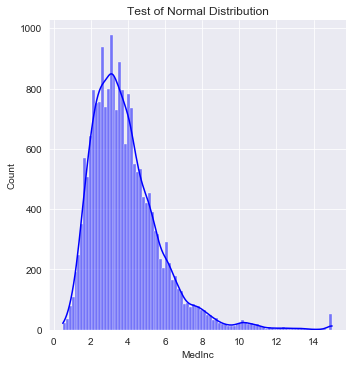

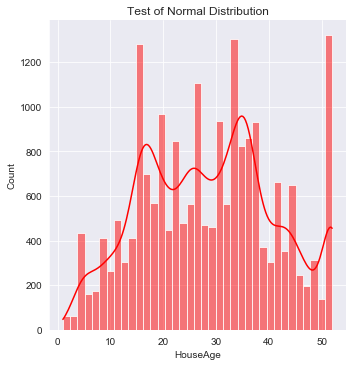

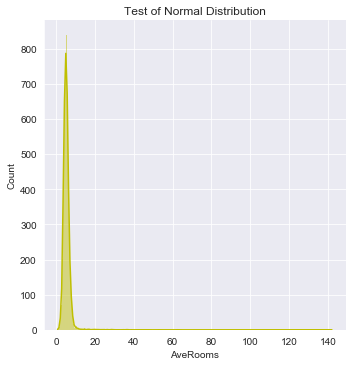

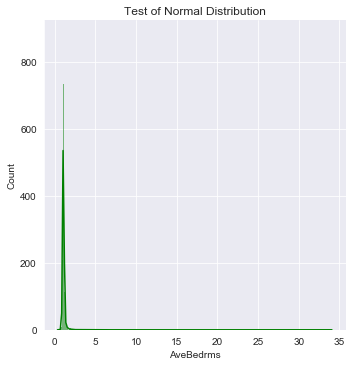

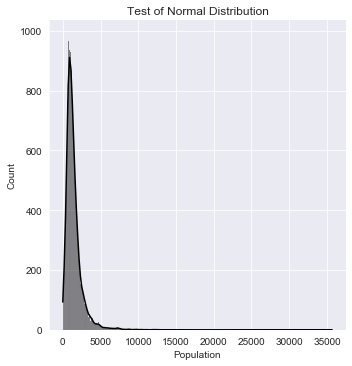

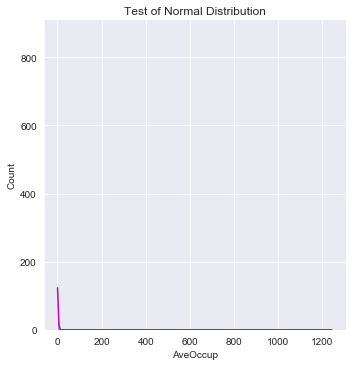

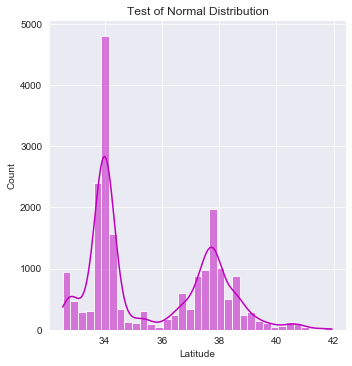

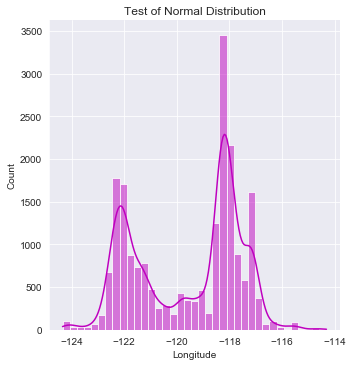

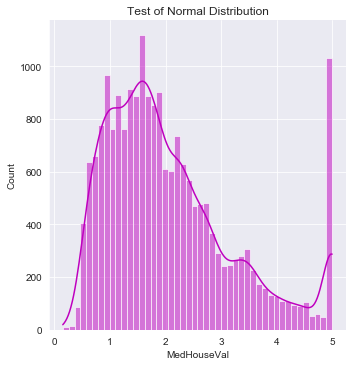

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set_style('darkgrid')
sns.displot(housing_df['MedInc'],kde=True, color="b").set(title='Test of Normal Distribution', xlabel='MedInc', ylabel='Count')
plt.show()
sns.displot(housing_df['HouseAge'], kde=True, color="r").set(title='Test of Normal Distribution', xlabel='HouseAge', ylabel='Count')
plt.show()
sns.displot(housing_df['AveRooms'], kde=True, color="y").set(title='Test of Normal Distribution', xlabel='AveRooms', ylabel='Count')
plt.show()
sns.displot(housing_df['AveBedrms'], kde=True, color="g").set(title='Test of Normal Distribution', xlabel='AveBedrms', ylabel='Count')
plt.show()
sns.displot(housing_df['Population'], kde=True, color="k").set(title='Test of Normal Distribution', xlabel='Population', ylabel='Count')
plt.show()
sns.displot(housing_df['AveOccup'], kde=True, color="m").set(title='Test of Normal Distribution', xlabel='AveOccup', ylabel='Count')
plt.show()
sns.displot(housing_df['Latitude'], kde=True, color="m").set(title='Test of Normal Distribution', xlabel='Latitude', ylabel='Count')
plt.show()
sns.displot(housing_df['Longitude'], kde=True, color="m").set(title='Test of Normal Distribution', xlabel='Longitude', ylabel='Count')
plt.show()
sns.displot(housing_df['MedHouseVal'], kde=True, color="m").set(title='Test of Normal Distribution', xlabel='MedHouseVal', ylabel='Count')
plt.show()



### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

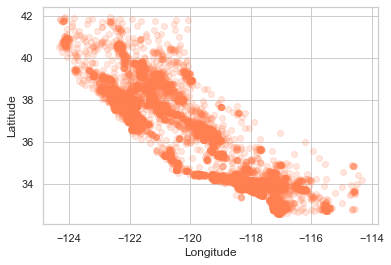

In [74]:
plt.scatter(housing_df['Longitude'], housing_df['Latitude'], color= '#FF7F5030')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [32]:
#KMeans(n_clusters=2)
#1
lat_lon_df = housing_df[['Latitude','Longitude']]
lat_lon_df.head()
#2
from sklearn.cluster import KMeans
#3
kmeans= KMeans(n_clusters=2)
kmeans.fit(lat_lon_df)
kmeans.predict(lat_lon_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [35]:
# array([[  33.94126851, -118.00789306],
#       [  37.95713201, -121.7178467 ]])

print (kmeans.cluster_centers_)
print (kmeans.labels_)
clust2 = kmeans.labels_
set(clust2)
#lat_lon_df[[clust2]].unique()

[[  33.94057002 -118.00729556]
 [  37.9562441  -121.71696077]]
[1 1 1 ... 1 1 1]


{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [44]:
lat_lon_df['clust2'] = clust2
lat_lon_df.head()

/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Latitude,Longitude,clust2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


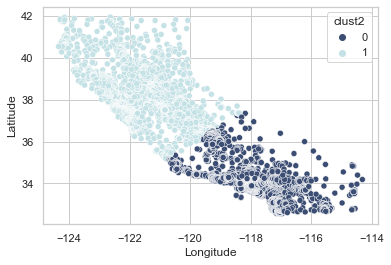

In [45]:
sns.set_theme(style="whitegrid")

sns.scatterplot(x="Longitude", y="Latitude",
                hue="clust2", palette="ch:r=-.2,d=.3_r", data=lat_lon_df)
               

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [46]:
housing_df['reg2']=lat_lon_df['clust2']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,reg2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [48]:
so_cal_df = housing_df[housing_df['reg2']==1]
so_cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,reg2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [49]:
no_cal_df = housing_df[housing_df['reg2']==0]
no_cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,reg2
2398,3.7857,19.0,20.200000,4.050000,187.0,2.337500,36.79,-118.91,0.786,0
2665,1.8793,38.0,5.744589,1.134199,784.0,3.393939,33.12,-115.52,0.608,0
2666,2.1630,18.0,4.383399,1.118577,1006.0,3.976285,33.13,-115.52,0.534,0
2667,2.1010,21.0,4.413793,0.939655,890.0,3.836207,33.12,-115.51,0.467,0
2668,1.0000,33.0,4.140940,1.251678,777.0,2.607383,33.19,-115.46,0.400,0


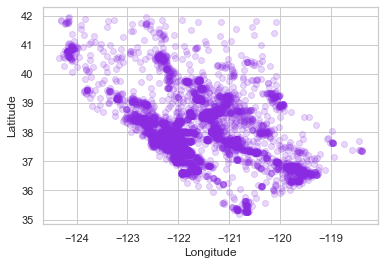

In [75]:
plt.scatter(so_cal_df['Longitude'], so_cal_df['Latitude'], color= '#8A2BE230')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

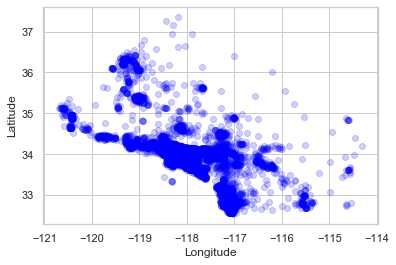

In [82]:
plt.scatter(no_cal_df['Longitude'], no_cal_df['Latitude'], color= '#0000FF30')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [54]:
#1.858
#1.655
print(so_cal_df['MedHouseVal'].median())
print(no_cal_df['MedHouseVal'].median())

1.655
1.858


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [59]:
kmeans1= KMeans(n_clusters=3)
kmeans1.fit(so_cal_df)
kmeans1.predict(so_cal_df)
clust3 = kmeans1.labels_
so_cal_df['clust3'] = clust3

/Users/pgarciaegan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


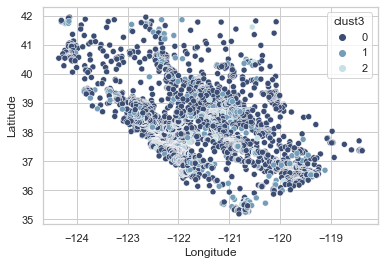

In [60]:
sns.set_theme(style="whitegrid")

sns.scatterplot(x="Longitude", y="Latitude",
                hue="clust3", palette="ch:r=-.2,d=.3_r", data=so_cal_df)

In [61]:
Clust = so_cal_df[so_cal_df['clust3']==0]
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['clust3']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['clust3']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['clust3']==2].median()}")

Clust 0 median house value: 1.607
Clust 1 median house value: 1.818
Clust 2 median house value: 1.795


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

In [62]:
kmeans2= KMeans(n_clusters=4)
kmeans2.fit(housing_df)
kmeans2.predict(housing_df)
clust4 = kmeans2.labels_
housing_df['clust4'] = clust4

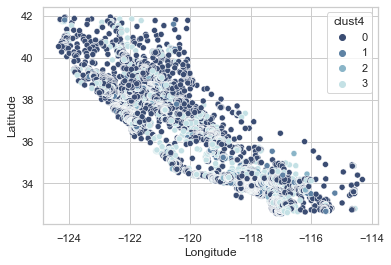

In [63]:
sns.set_theme(style="whitegrid")

sns.scatterplot(x="Longitude", y="Latitude",
                hue="clust4", palette="ch:r=-.2,d=.3_r", data=housing_df)

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
